<a href="https://colab.research.google.com/github/sushree-akankshya-panda/Machine-Learning/blob/main/WINE_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/My Drive/WineQuality/WineQT.csv')
df

Mounted at /content/drive


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

**3.7.1 PREPROCESSING**

In [ ]:
#load dataset and split into training and testing set
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


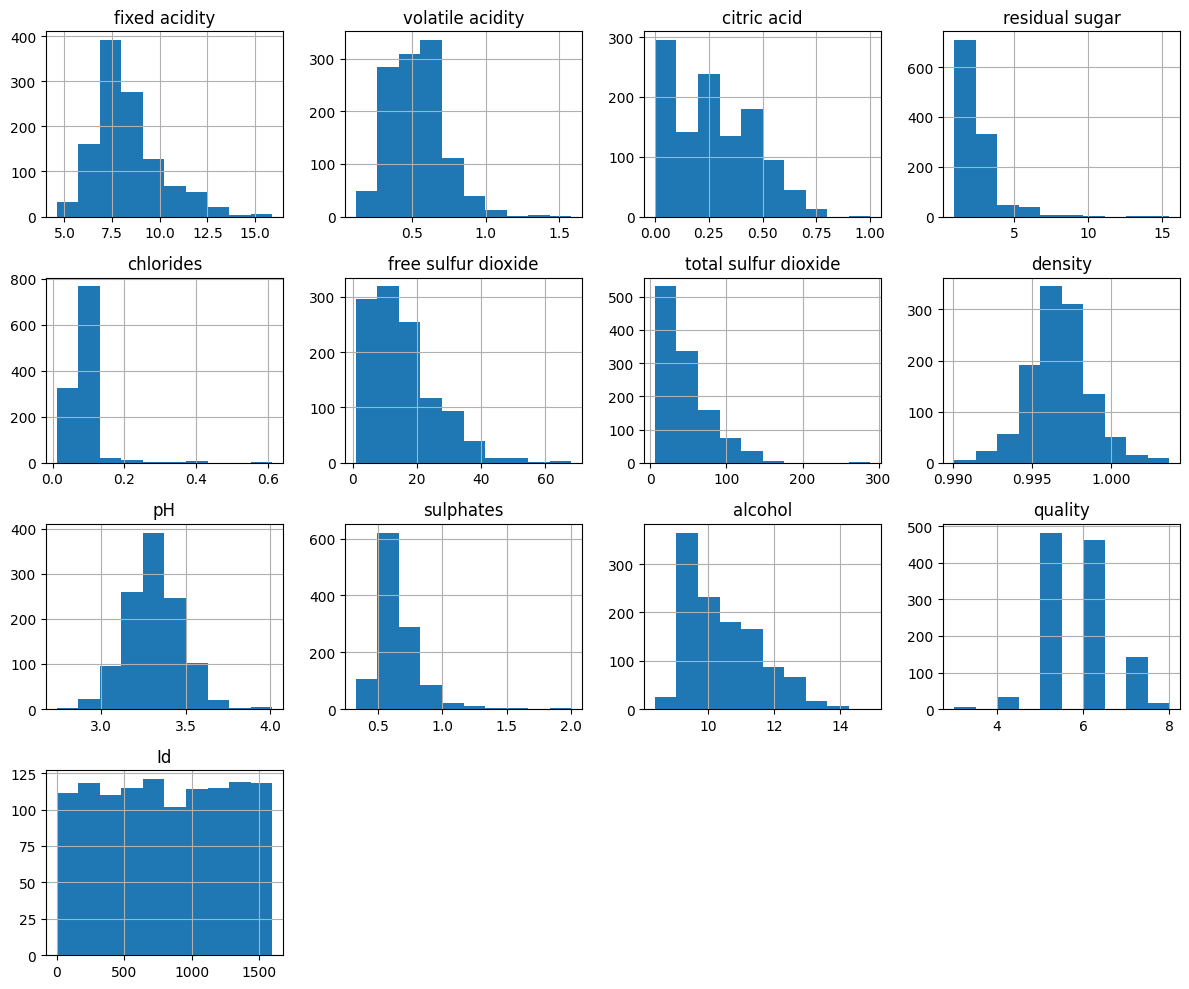

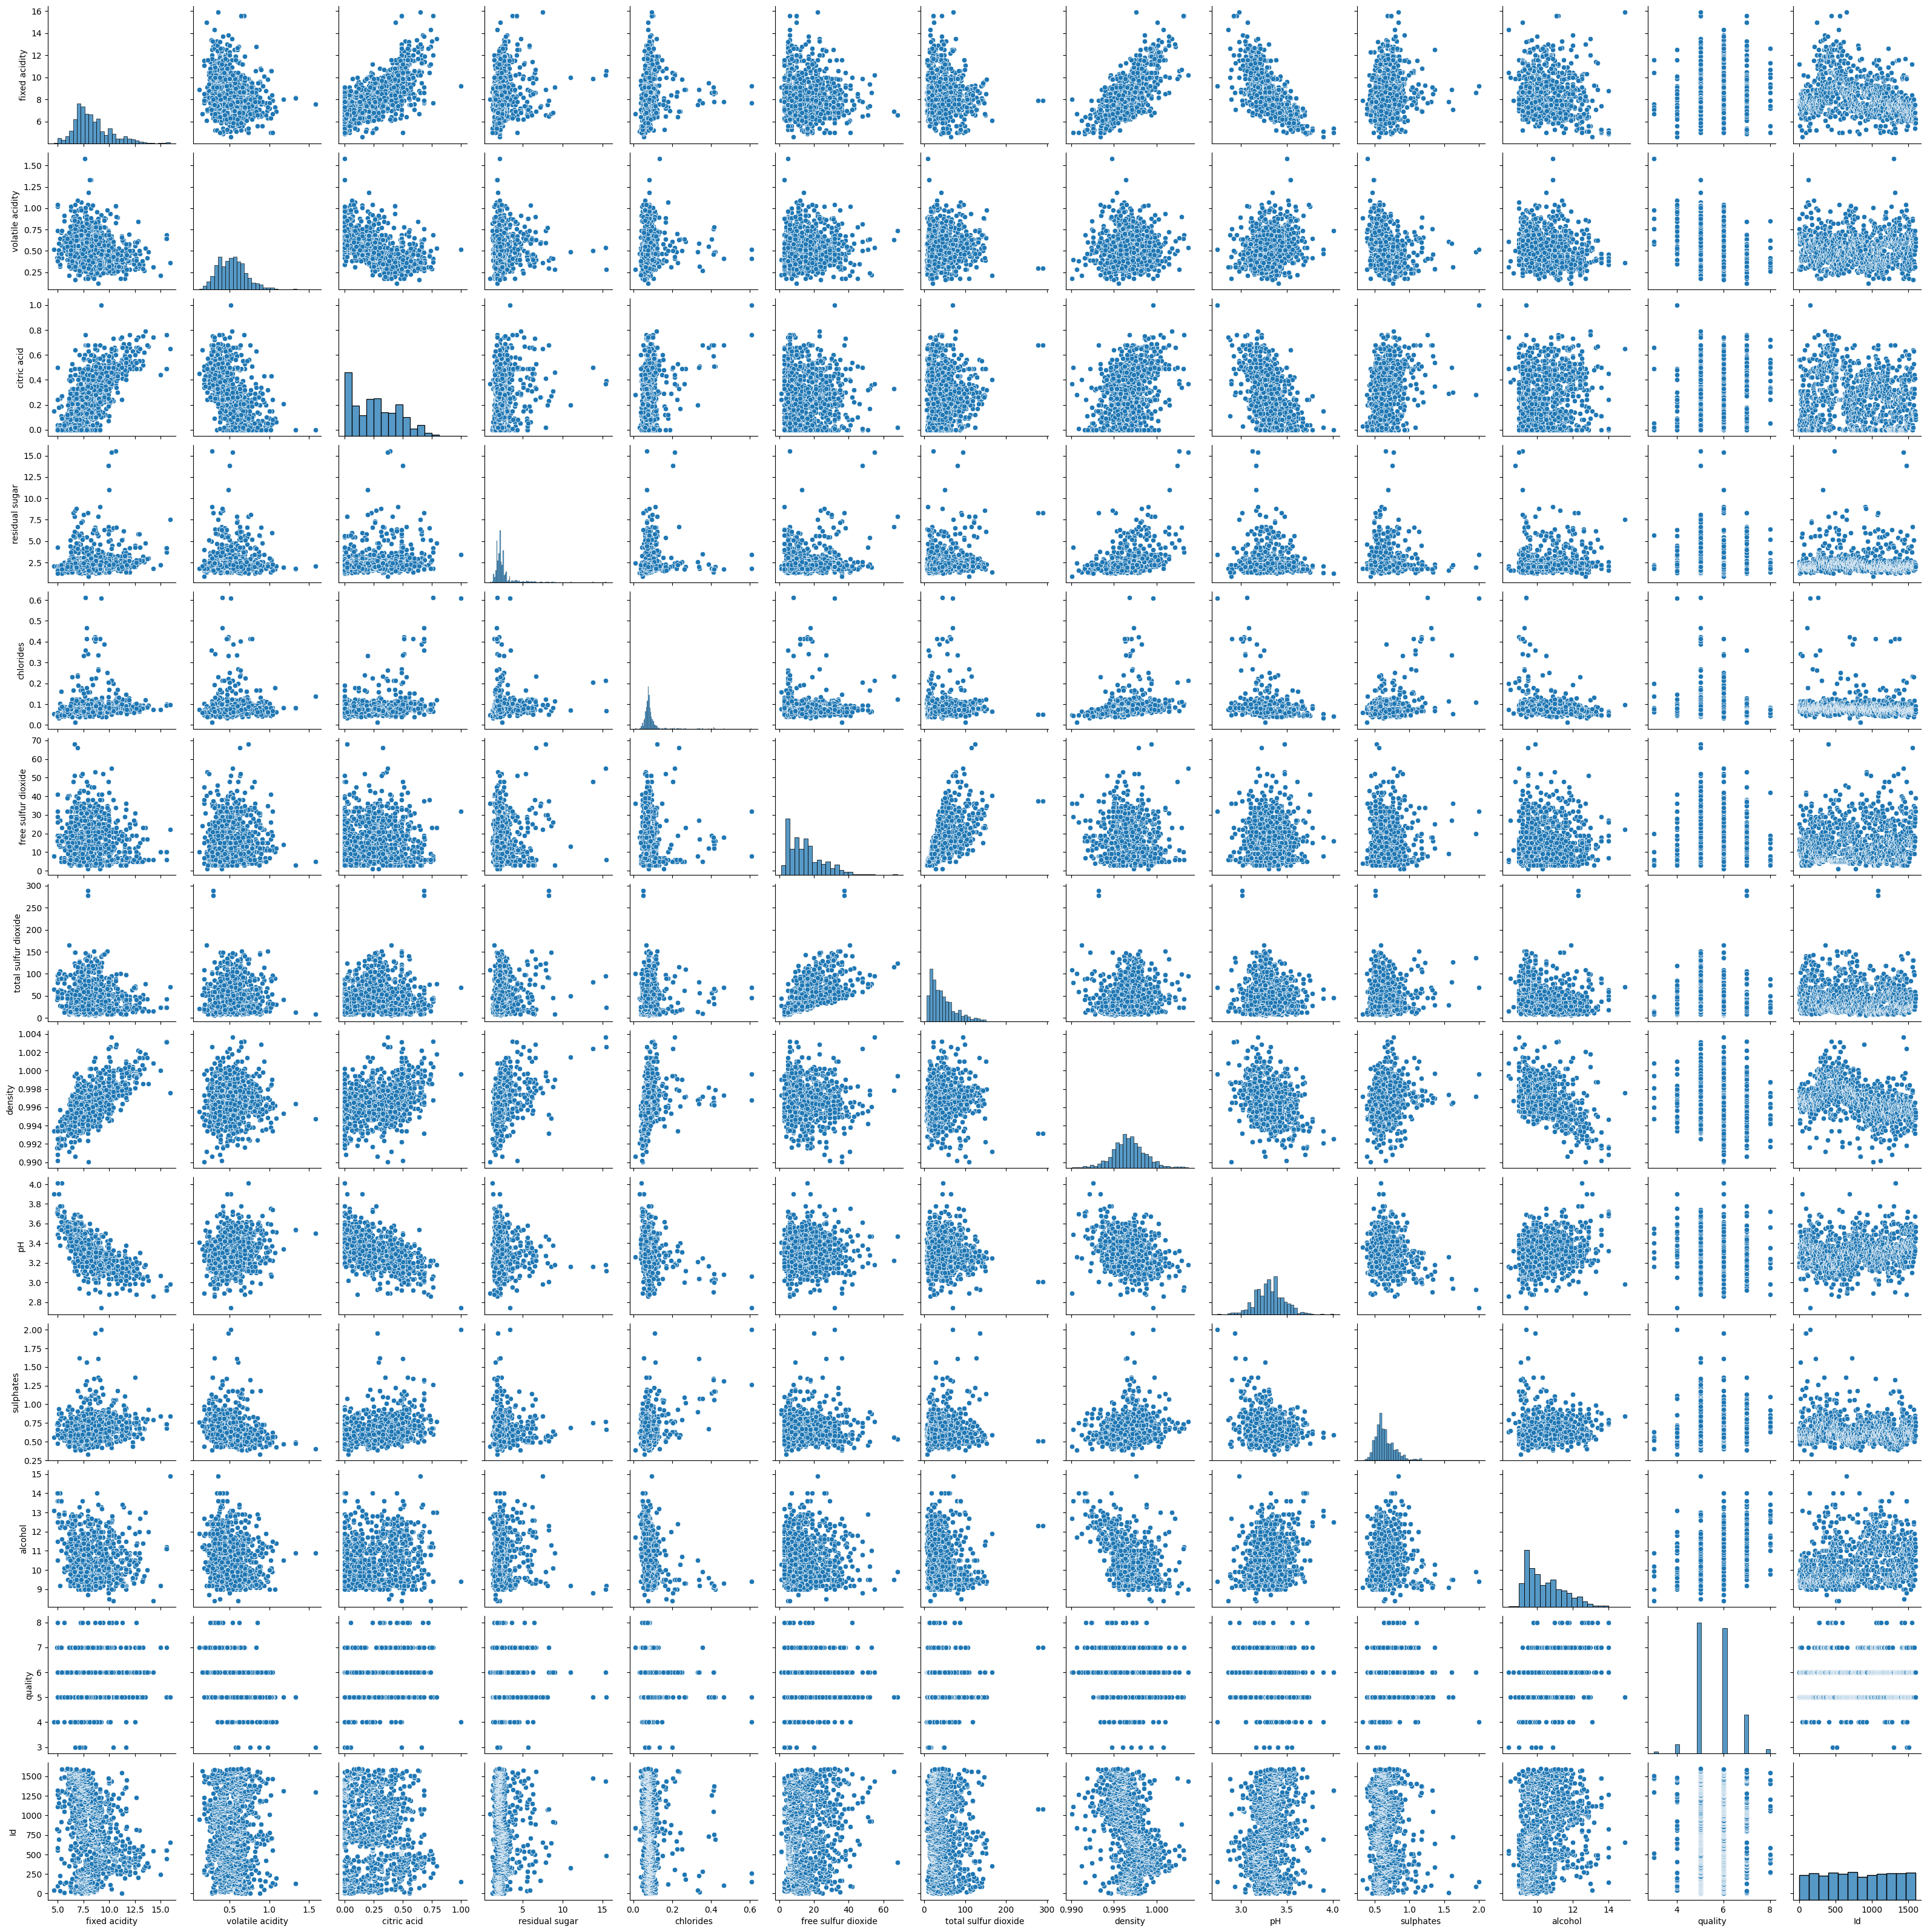

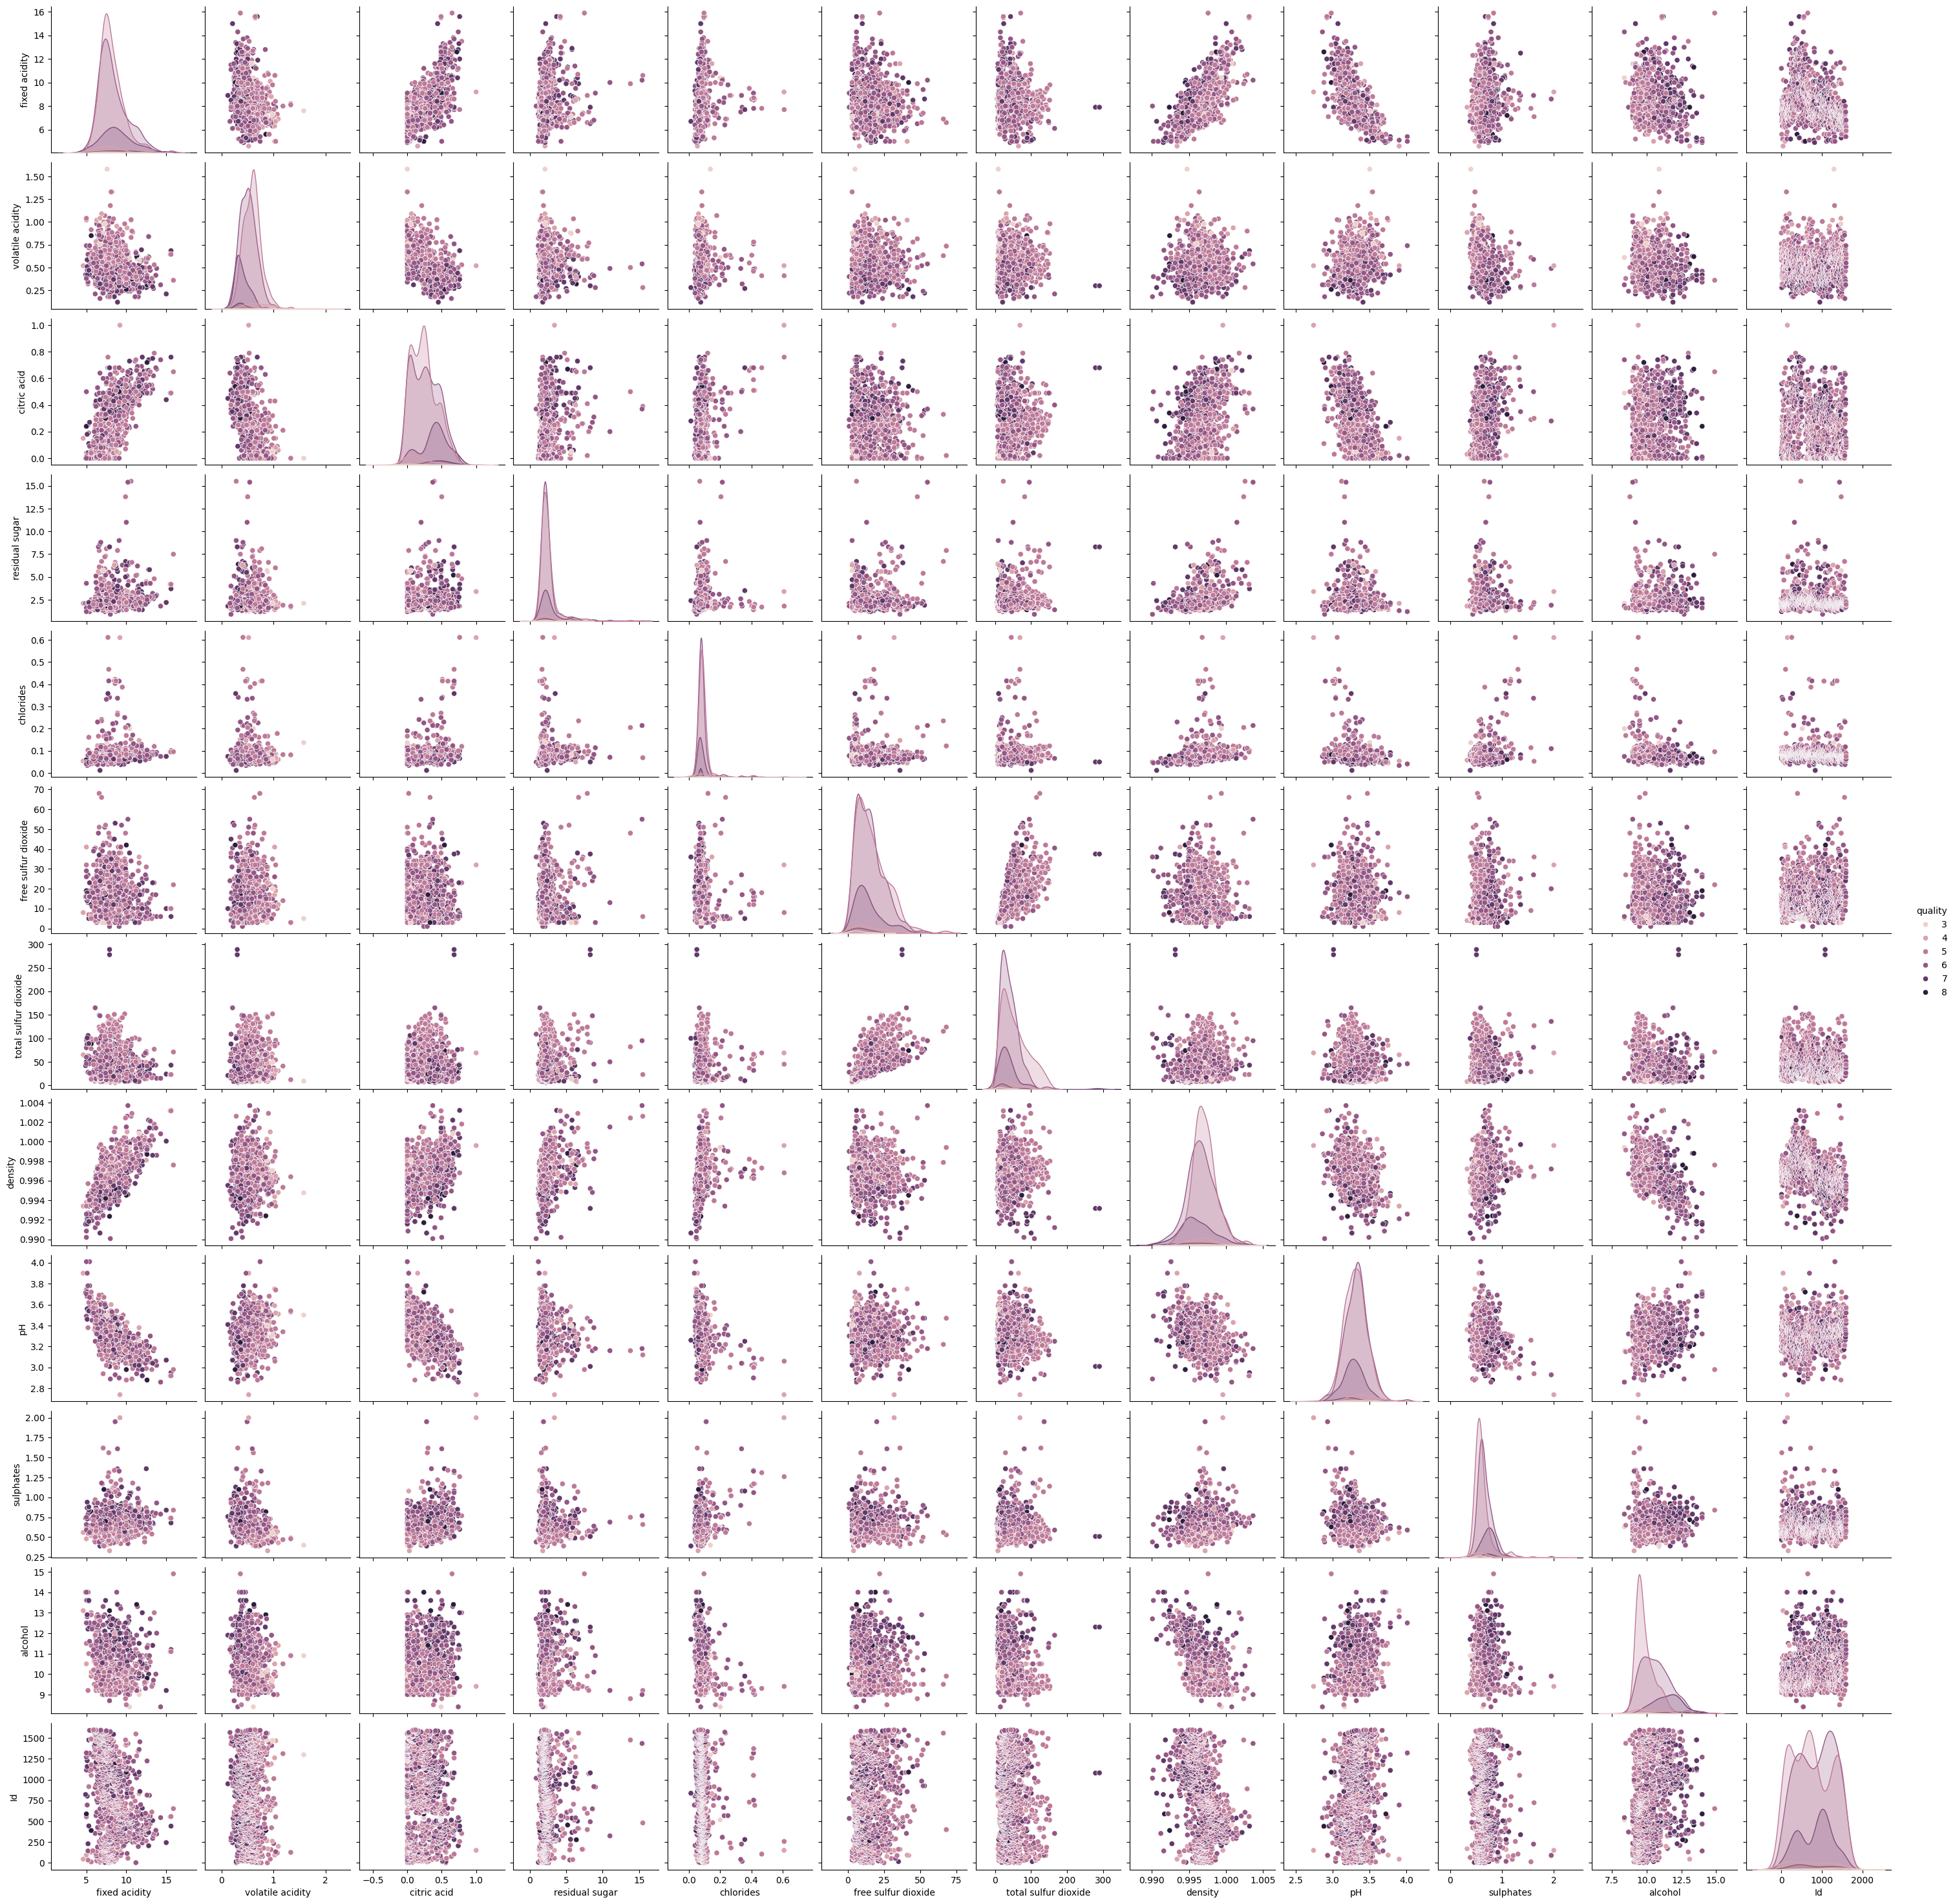

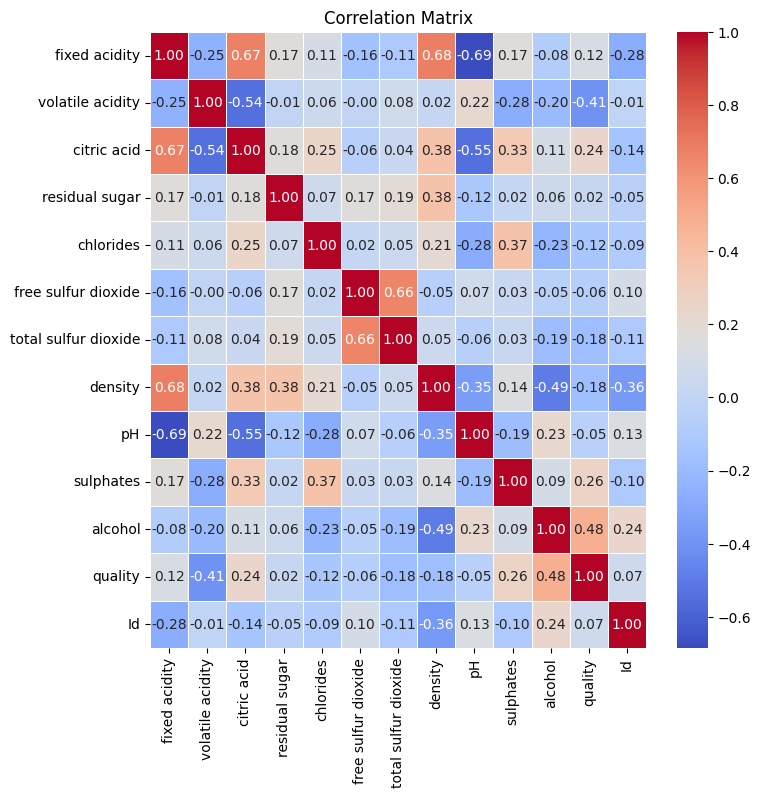

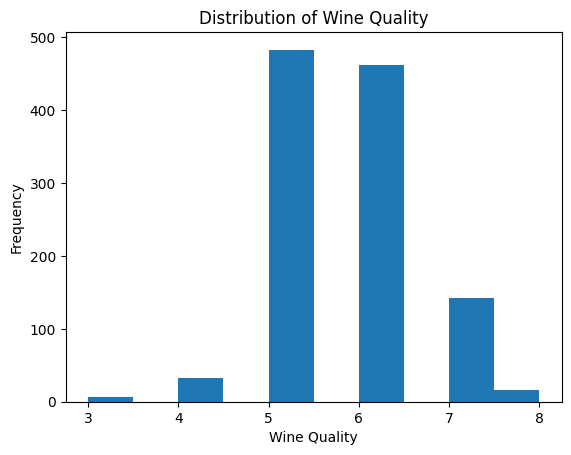

In [ ]:
#use EDA: plot feature distributions, correlations,or class distribution
# Plot histograms for all features
df.hist(bins=10, figsize=(12, 10))
plt.tight_layout()
plt.show()

# pair plot for all features
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
sns.pairplot(df, hue='quality')
plt.show()
#Calculate and plot correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Plot countplot for 'quality'
plt.hist(df['quality'])
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality')
plt.show()

**3.7.1 BUILD AND TRAIN AN MLP CLASSIFIER**

In [ ]:
#use tensorflow to create multilayer fully connected model with default parameter
import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Input layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae']) # Using Adam optimizer, Mean Squared Error loss, and Mean Absolute Error metric

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,985 (39.00 KB)

 Trainable params: 9,985 (39.00 KB)

 Non-trainable params: 0 (0.00 B)

**3.7.3. BUILD AND TRAIN AND MLP CLASSIFIER**

In [ ]:
#Compile and train the model using different optimizers
#Define the model (same as before)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Define a list of optimizers to try
optimizers = ['adam', 'sgd', 'rmsprop']  # You can add more optimizers here

# Loop through the optimizers and train the model
for optimizer_name in optimizers:
    # Compile the model with the current optimizer
    model.compile(optimizer=optimizer_name, loss='mse', metrics=['mae'])

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)  # Adjust epochs and batch_size as needed

    # Print results or evaluate the model on the test set (X_test_scaled, y_test)
    # ...

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 22.3324 - mae: 4.5757 - val_loss: 6.2404 - val_mae: 2.1745
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3553 - mae: 1.7206 - val_loss: 3.5601 - val_mae: 1.4068
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1587 - mae: 1.1539 - val_loss: 2.6680 - val_mae: 1.2657
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8662 - mae: 1.0930 - val_loss: 2.3279 - val_mae: 1.1690
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5708 - mae: 0.9728 - val_loss: 2.1894 - val_mae: 1.1294
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4894 - mae: 0.9499 - val_loss: 2.0171 - val_mae: 1.0984
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2926 - mae: 0.8787 - val_loss: 1.8490 - val_mae: 1.0643
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2850 - mae: 0.8806 - val_loss: 1.8348 - val_mae: 1.0403
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1101 - 